In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path="../data/"
outputs_path="../outputs/"
## READ DATA
test_set_complete=pd.read_csv(outputs_path+"general/test_set_final.csv")
train_set=pd.read_csv(outputs_path+"general/train_set_final.csv")
dev_set=pd.read_csv(outputs_path+"general/dev_set_final.csv")

In [3]:
test_set=test_set_complete.iloc[:2000]

In [4]:
test_set.shape

(2000, 17)

In [5]:
def text_features(df):
    df=df.assign(num_sentences=df.text.str.split('.').apply(lambda x:len(x)))
    df=df.assign(words=df.text.str.split(' '))
    df=df.assign(num_words=df.words.apply(lambda x:len(x)))
    return df

In [6]:
test_set=text_features(test_set)
train_set=text_features(train_set)
dev_set=text_features(dev_set)

'akasaki-kaji-2019-conversation','bramsen-etal-2011-extracting'

## total and positives

In [7]:
dev_set.shape

(500, 20)

In [8]:
dev_set.label.value_counts()

0    443
1     57
Name: label, dtype: int64

In [9]:
test_set.shape

(2000, 20)

In [10]:
test_set.label.value_counts()

0    1749
1     251
Name: label, dtype: int64

In [11]:
train_set.shape

(2500, 20)

In [12]:
train_set.label.value_counts()

0    2216
1     284
Name: label, dtype: int64

In [13]:
df_all=pd.concat([dev_set,train_set,test_set])

In [14]:
df_all.label.value_counts()

0    4408
1     592
Name: label, dtype: int64

In [15]:
df_all.shape

(5000, 20)

## sentences

In [16]:
df_all.num_sentences.sum()

40533

In [17]:
df_all.num_words.sum()

656939

In [18]:
uniques = set()
df_all.text.str.lower().str.split().apply(uniques.update)
len(uniques)

45088

In [19]:
dev_set.num_sentences.sum()

4112

In [20]:
dev_set.num_words.sum()

65705

In [21]:
uniques = set()
dev_set.text.str.lower().str.split().apply(uniques.update)
len(uniques)

10511

In [22]:
test_set.num_sentences.sum()

16116

In [23]:
test_set.num_words.sum()

260616

In [24]:
uniques = set()
test_set.text.str.lower().str.split().apply(uniques.update)
len(uniques)

24913

In [25]:
train_set.num_sentences.sum()

20305

In [26]:
train_set.num_words.sum()

330618

In [27]:
uniques = set()
train_set.text.str.lower().str.split().apply(uniques.update)
len(uniques)

29274

In [28]:
df_all.columns

Index(['ID', 'url', 'label', 'task_annotation', 'method_annotation',
       'org_annotation', 'goal1_raw', 'goal2_raw', 'goal3_raw',
       'title_abstract_clean', 'title', 'abstract', 'title_clean',
       'abstract_clean', 'acknowledgments_clean', 'text', 'year',
       'num_sentences', 'words', 'num_words'],
      dtype='object')

## Subtask2


# goal counts

In [29]:
df_all.goal2_raw=df_all.goal2_raw.fillna('')
df_all.goal3_raw=df_all.goal3_raw.fillna('')

In [30]:
df_all=df_all.assign(goal1=np.where(df_all['goal1_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("marine_life"),'Life Below Water',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(df_all['goal1_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

df_all=df_all.assign(goal2=np.where(df_all['goal2_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("marine_life"),'Life Below Water',         
                    np.where(df_all['goal2_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(df_all['goal2_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

df_all=df_all.assign(goal3=np.where(df_all['goal3_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("marine_life"),'Life Below Water',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(df_all['goal3_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

In [31]:
df_all_sg=df_all.loc[df_all.label==1]

In [32]:
df_all_sg['goal3_raw'].value_counts()

                                         589
gender_equality                            2
peace_justice_and_strong_institutions      1
Name: goal3_raw, dtype: int64

peace 84
hate speech 44
fake news 44
privacy_protection 11
deception_detectio  6

In [33]:
df_all_sg['goal2_raw'].value_counts()

                                           532
social_equality                             11
industry_innovation_infrastructure          11
peace_justice_and_strong_institutions        8
health                                       6
education                                    5
partnership                                  3
privacy_protection                           3
gender_equality                              3
decent_work_and_economy                      2
disinformation_and_fake_news                 2
peace, justice, and strong institutions      2
climate                                      1
hate_speech                                  1
innovation and infrastructure                1
sustainable_cities                           1
Name: goal2_raw, dtype: int64

In [34]:
df_all_sg['goal1_raw'].value_counts()

health                                    196
education                                  91
peace_justice_and_strong_institutions      73
industry_innovation_infrastructure         70
hate_speech                                43
disinformation_and_fake_news               42
social_equality                            20
gender_equality                            13
partnership                                13
decent_work_and_economy                    12
privacy_protection                          8
deception_detection                         6
sustainable_cities                          4
responsible_consumption_and_production      1
Name: goal1_raw, dtype: int64

In [35]:
df_all_sg.goal1.value_counts()

Good Health and Well-Being                 196
Peace, Justice and Strong Institutions     172
Quality Education                           91
Industry, Innovation and Infrastructure     70
Reduced Inequalities                        20
Gender Equality                             13
Partnership for the goals                   13
Decent Work and Economic Growth             12
Sustainable Cities and Communities           4
Responsible Consumption and Production       1
Name: goal1, dtype: int64

In [36]:
df_all_sg.goal2.value_counts()

                                           532
Peace, Justice and Strong Institutions      16
Industry, Innovation and Infrastructure     12
Reduced Inequalities                        11
Good Health and Well-Being                   6
Quality Education                            5
Partnership for the goals                    3
Gender Equality                              3
Decent Work and Economic Growth              2
Climate Action                               1
Sustainable Cities and Communities           1
Name: goal2, dtype: int64

In [37]:
df_all_sg.goal3.value_counts()

                                          589
Gender Equality                             2
Peace, Justice and Strong Institutions      1
Name: goal3, dtype: int64

In [38]:
df_all_sg.shape

(592, 23)

In [144]:
30/592

0.05067567567567568

In [145]:
np.round(pd.concat([df_all_sg.goal1,df_all_sg.goal2,df_all_sg.goal3]).value_counts()/592,4)

                                           1.8936
Good Health and Well-Being                 0.3412
Peace, Justice and Strong Institutions     0.3193
Quality Education                          0.1622
Industry, Innovation and Infrastructure    0.1385
Reduced Inequalities                       0.0524
Gender Equality                            0.0304
Partnership for the goals                  0.0270
Decent Work and Economic Growth            0.0236
Sustainable Cities and Communities         0.0084
Responsible Consumption and Production     0.0017
Climate Action                             0.0017
dtype: float64

In [88]:
np.round(pd.concat([df_all_sg.goal1,df_all_sg.goal2,df_all_sg.goal3]).value_counts(),4)

                                           1121
Good Health and Well-Being                  202
Peace, Justice and Strong Institutions      189
Quality Education                            96
Industry, Innovation and Infrastructure      82
Reduced Inequalities                         31
Gender Equality                              18
Partnership for the goals                    16
Decent Work and Economic Growth              14
Sustainable Cities and Communities            5
Responsible Consumption and Production        1
Climate Action                                1
dtype: int64

## goals low ocurrence

In [54]:
low_ocurrence=pd.read_csv(data_path+"test_data/low_occurrence_annotated.csv")

low_ocurrence=low_ocurrence.rename(columns={'Most Related SG goal':'goal1_raw',
       '(if exists) 2nd Related SG Goal':'goal2_raw', '(if exists) 3rd Related SG Goal':'goal3_raw'})
low_ocurrence=low_ocurrence.rename(columns={"SG_or_not":"label"})
low_ocurrence["label"]=low_ocurrence["label"].fillna(0)




In [55]:
low_ocurrence=low_ocurrence.loc[~low_ocurrence.ID.isin(df_all_sg.ID.unique())]

In [56]:
low_ocurrence.shape

(261, 10)

In [57]:
low_ocurrence['Keyword Goal'].value_counts()

decent_work_and_economy    67
gender_equality            67
partnership                40
sustainable_cities         33
hunger                     25
climate                    21
clean_water                 3
energy                      2
marine_life                 2
poverty                     1
Name: Keyword Goal, dtype: int64

In [58]:
low_ocurrence=low_ocurrence.loc[low_ocurrence.label==1]

In [59]:
low_ocurrence=low_ocurrence.assign(low=1)

In [65]:
low_ocurrence.shape

(167, 14)

In [61]:
low_ocurrence.goal2_raw=low_ocurrence.goal2_raw.fillna('')
low_ocurrence.goal3_raw=low_ocurrence.goal3_raw.fillna('')

low_ocurrence=low_ocurrence.assign(goal1=np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("marine_life"),'Life Below Water',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(low_ocurrence['goal1_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

low_ocurrence=low_ocurrence.assign(goal2=np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("marine_life"),'Life Below Water',         
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(low_ocurrence['goal2_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

low_ocurrence=low_ocurrence.assign(goal3=np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("marine_life"),'Life Below Water',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(low_ocurrence['goal3_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

In [63]:
low_ocurrence.shape

(167, 14)

In [64]:
np.round(pd.concat([low_ocurrence.goal1,low_ocurrence.goal2,low_ocurrence.goal3]).value_counts(),4)

                                           319
Gender Equality                             67
Decent Work and Economic Growth             44
Climate Action                              19
Industry, Innovation and Infrastructure     15
Peace, Justice and Strong Institutions      12
Sustainable Cities and Communities          11
Partnership for the goals                    5
Zero Hunger                                  4
Life Below Water                             2
Reduced Inequalities                         1
Clean Water and Sanitation                   1
Quality Education                            1
dtype: int64

In [91]:
df_all_goals=pd.concat([dev_set,train_set,test_set,low_ocurrence])

In [92]:
df_all_goals=df_all_goals.drop_duplicates(subset=['ID'],keep='first').reset_index(drop=True)

In [93]:
df_all_goals.shape

(5167, 22)

In [96]:
df_all_goals.goal2_raw=df_all_goals.goal2_raw.fillna('')
df_all_goals.goal3_raw=df_all_goals.goal3_raw.fillna('')

In [97]:
df_all_goals=df_all_goals.assign(goal1=np.where(df_all_goals['goal1_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("marine_life"),'Life Below Water',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(df_all_goals['goal1_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

df_all_goals=df_all_goals.assign(goal2=np.where(df_all_goals['goal2_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("marine_life"),'Life Below Water',         
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(df_all_goals['goal2_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

df_all_goals=df_all_goals.assign(goal3=np.where(df_all_goals['goal3_raw'].str.lower().str.contains("education"),'Quality Education',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("poverty"),'No Poverty',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("hunger"),'Zero Hunger',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("clean_water"),'Clean Water and Sanitation',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("clean_energy"),'Affordable and Clean Energy',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("life_land"),'Life on Land',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("marine_life"),'Life Below Water',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("health"),'Good Health and Well-Being',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("climate"),'Climate Action',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("peace|privacy|disinformation_and_fake_news|deception|hate"),'Peace, Justice and Strong Institutions',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("social biases|race & identity"),'Reduced Inequalities',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("industry|innovation|research"),'Industry, Innovation and Infrastructure',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("sustainable cities|sustainable_cities"),'Sustainable Cities and Communities',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("gender"),'Gender Equality',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("decent work|decent_work_and_economy"),'Decent Work and Economic Growth',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("partnership"),'Partnership for the goals',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("responsible_consumption_and_production"),'Responsible Consumption and Production',
                    np.where(df_all_goals['goal3_raw'].str.lower().str.contains("reduced|social_equality"),'Reduced Inequalities',''
                          )))))))))))))))))))

In [98]:
df_all_goals_sg=df_all_goals.loc[df_all_goals.label==1]

In [99]:
df_all_goals['goal1_raw'].value_counts()

health                                    197
education                                 101
peace_justice_and_strong_institutions      83
gender_equality                            80
industry_innovation_infrastructure         80
decent_work_and_economy                    54
hate_speech                                43
disinformation_and_fake_news               42
business_use                               30
social_equality                            27
climate                                    19
partnership                                15
finance                                    14
sustainable_cities                         14
general_purpose_productivity               10
privacy_protection                          8
deception_detection                         6
hunger                                      4
responsible_consumption_and_production      1
marine_life                                 1
clean_water                                 1
Name: goal1_raw, dtype: int64

In [100]:
df_all_goals_sg.shape

(759, 25)

In [101]:
df_all_goals_sg_original=df_all_goals_sg.loc[df_all_goals_sg.low.isna()]

In [102]:
df_all_goals_sg_original.shape

(592, 25)

In [103]:
np.round(pd.concat([df_all_goals_sg_original.goal1,df_all_goals_sg_original.goal2,df_all_goals_sg_original.goal3]).value_counts()/592,4)

                                           1.8936
Good Health and Well-Being                 0.3412
Peace, Justice and Strong Institutions     0.3193
Quality Education                          0.1622
Industry, Innovation and Infrastructure    0.1385
Reduced Inequalities                       0.0524
Gender Equality                            0.0304
Partnership for the goals                  0.0270
Decent Work and Economic Growth            0.0236
Sustainable Cities and Communities         0.0084
Responsible Consumption and Production     0.0017
Climate Action                             0.0017
dtype: float64

In [104]:
np.round(pd.concat([df_all_goals_sg.goal1,df_all_goals_sg.goal2,df_all_goals_sg.goal3]).value_counts(),4)

                                           1440
Good Health and Well-Being                  202
Peace, Justice and Strong Institutions      201
Quality Education                            97
Industry, Innovation and Infrastructure      97
Gender Equality                              85
Decent Work and Economic Growth              58
Reduced Inequalities                         32
Partnership for the goals                    21
Climate Action                               20
Sustainable Cities and Communities           16
Zero Hunger                                   4
Life Below Water                              2
Responsible Consumption and Production        1
Clean Water and Sanitation                    1
dtype: int64

In [105]:
np.round(pd.concat([df_all_goals_sg.goal1,df_all_goals_sg.goal2,df_all_goals_sg.goal3]).value_counts(),4).reset_index()

,index,0
0,,1440
1,Good Health and Well-Being,202
2,"Peace, Justice and Strong Institutions",201
3,Quality Education,97
4,"Industry, Innovation and Infrastructure",97
5,Gender Equality,85
6,Decent Work and Economic Growth,58
7,Reduced Inequalities,32
8,Partnership for the goals,21
9,Climate Action,20


In [55]:
np.round(pd.concat([df_all_goals_sg.goal1,df_all_goals_sg.goal2,df_all_goals_sg.goal3]).value_counts()/759,4)

                                           1.8972
Good Health and Well-Being                 0.2661
Peace, Justice and Strong Institutions     0.2648
Quality Education                          0.1278
Industry, Innovation and Infrastructure    0.1278
Gender Equality                            0.1120
Decent Work and Economic Growth            0.0764
Reduced Inequalities                       0.0422
Partnership for the goals                  0.0277
Climate Action                             0.0264
Sustainable Cities and Communities         0.0211
Zero Hunger                                0.0053
Life Below Water                           0.0026
Responsible Consumption and Production     0.0013
Clean Water and Sanitation                 0.0013
dtype: float64

## analysis

In [58]:
df_goals=df_all_goals_sg.loc[df_all_goals_sg.label==1]

In [59]:
df_goals=df_goals.assign(goals_count=np.where(df_goals.goal2!='',2,1))
df_goals=df_goals.assign(goals_count=np.where(df_goals.goal3!='',df_goals.goals_count+1,df_goals.goals_count))

In [60]:
df_goals.goals_count.mean()

1.1027667984189724

In [61]:
df_goals=df_goals.assign(goal2=np.where(df_goals.goal2=='',df_goals.goal1,df_goals.goal2))

## heatmap

In [63]:
def extract_predictions(df):
    df=df.assign(sdg1=np.where(df['goal1'].str.lower().str.contains("goal 1 |goal 1:|poverty"),1,0))
    df=df.assign(sdg2=np.where(df['goal1'].str.lower().str.contains("goal 2|hunger"),1,0))
    df=df.assign(sdg3=np.where(df['goal1'].str.lower().str.contains("goal 3|health"),1,0))
    df=df.assign(sdg4=np.where(df['goal1'].str.lower().str.contains("goal 4|education"),1,0))
    df=df.assign(sdg5=np.where(df['goal1'].str.lower().str.contains("goal 5|gender"),1,0))
    df=df.assign(sdg6=np.where(df['goal1'].str.lower().str.contains("goal 6|clean water"),1,0))
    df=df.assign(sdg7=np.where(df['goal1'].str.lower().str.contains("goal 7|clean energy"),1,0))
    df=df.assign(sdg8=np.where(df['goal1'].str.lower().str.contains("goal 8|decent work"),1,0))
    df=df.assign(sdg9=np.where(df['goal1'].str.lower().str.contains("goal 9|industry|innovation"),1,0))
    df=df.assign(sdg10=np.where(df['goal1'].str.lower().str.contains("goal 10|inequal"),1,0))
    df=df.assign(sdg11=np.where(df['goal1'].str.lower().str.contains("goal 11|sustainable cities"),1,0))
    df=df.assign(sdg12=np.where(df['goal1'].str.lower().str.contains("goal 12|responsible consumption"),1,0))
    df=df.assign(sdg13=np.where(df['goal1'].str.lower().str.contains("goal 13|climate"),1,0))
    df=df.assign(sdg14=np.where(df['goal1'].str.lower().str.contains("goal 14|life below water"),1,0))
    df=df.assign(sdg15=np.where(df['goal1'].str.lower().str.contains("goal 15|life on land"),1,0))
    df=df.assign(sdg16=np.where(df['goal1'].str.lower().str.contains("goal 16|peace|justice"),1,0))
    df=df.assign(sdg17=np.where(df['goal1'].str.lower().str.contains("goal 17|partnership"),1,0))


    df=df.assign(sdg1=np.where(df['goal2'].str.lower().str.contains("goal 1 |goal 1:|poverty"),1,df.sdg1))
    df=df.assign(sdg2=np.where(df['goal2'].str.lower().str.contains("goal 2|hunger"),1,df.sdg2))
    df=df.assign(sdg3=np.where(df['goal2'].str.lower().str.contains("goal 3|health"),1,df.sdg3))
    df=df.assign(sdg4=np.where(df['goal2'].str.lower().str.contains("goal 4|education"),1,df.sdg4))
    df=df.assign(sdg5=np.where(df['goal2'].str.lower().str.contains("goal 5|gender"),1,df.sdg5))
    df=df.assign(sdg6=np.where(df['goal2'].str.lower().str.contains("goal 6|clean water"),1,df.sdg6))
    df=df.assign(sdg7=np.where(df['goal2'].str.lower().str.contains("goal 7|clean energy"),1,df.sdg7))
    df=df.assign(sdg8=np.where(df['goal2'].str.lower().str.contains("goal 8|decent work"),1,df.sdg8))
    df=df.assign(sdg9=np.where(df['goal2'].str.lower().str.contains("goal 9|industry|innovation"),1,df.sdg9))
    df=df.assign(sdg10=np.where(df['goal2'].str.lower().str.contains("goal 10|inequal"),1,df.sdg10))
    df=df.assign(sdg11=np.where(df['goal2'].str.lower().str.contains("goal 11|sustainable cities"),1,df.sdg11))
    df=df.assign(sdg12=np.where(df['goal2'].str.lower().str.contains("goal 12|responsible consumption"),1,df.sdg12))
    df=df.assign(sdg13=np.where(df['goal2'].str.lower().str.contains("goal 13|climate"),1,df.sdg13))
    df=df.assign(sdg14=np.where(df['goal2'].str.lower().str.contains("goal 14|life below water"),1,df.sdg14))
    df=df.assign(sdg15=np.where(df['goal2'].str.lower().str.contains("goal 15|life on land"),1,df.sdg15))
    df=df.assign(sdg16=np.where(df['goal2'].str.lower().str.contains("goal 16|peace|justice"),1,df.sdg16))
    df=df.assign(sdg17=np.where(df['goal2'].str.lower().str.contains("goal 17|partnership"),1,df.sdg17))


    df=df.assign(sdg1=np.where(df['goal3'].str.lower().str.contains("goal 1 |goal 1:|poverty"),1,df.sdg1))
    df=df.assign(sdg2=np.where(df['goal3'].str.lower().str.contains("goal 2|hunger"),1,df.sdg2))
    df=df.assign(sdg3=np.where(df['goal3'].str.lower().str.contains("goal 3|health"),1,df.sdg3))
    df=df.assign(sdg4=np.where(df['goal3'].str.lower().str.contains("goal 4|education"),1,df.sdg4))
    df=df.assign(sdg5=np.where(df['goal3'].str.lower().str.contains("goal 5|gender"),1,df.sdg5))
    df=df.assign(sdg6=np.where(df['goal3'].str.lower().str.contains("goal 6|clean water"),1,df.sdg6))
    df=df.assign(sdg7=np.where(df['goal3'].str.lower().str.contains("goal 7|clean energy"),1,df.sdg7))
    df=df.assign(sdg8=np.where(df['goal3'].str.lower().str.contains("goal 8|decent work"),1,df.sdg8))
    df=df.assign(sdg9=np.where(df['goal3'].str.lower().str.contains("goal 9|industry|innovation"),1,df.sdg9))
    df=df.assign(sdg10=np.where(df['goal3'].str.lower().str.contains("goal 10|inequal"),1,df.sdg10))
    df=df.assign(sdg11=np.where(df['goal3'].str.lower().str.contains("goal 11|sustainable cities"),1,df.sdg11))
    df=df.assign(sdg12=np.where(df['goal3'].str.lower().str.contains("goal 12|responsible consumption"),1,df.sdg12))
    df=df.assign(sdg13=np.where(df['goal3'].str.lower().str.contains("goal 13|climate"),1,df.sdg13))
    df=df.assign(sdg14=np.where(df['goal3'].str.lower().str.contains("goal 14|life below water"),1,df.sdg14))
    df=df.assign(sdg15=np.where(df['goal3'].str.lower().str.contains("goal 15|life on land"),1,df.sdg15))
    df=df.assign(sdg16=np.where(df['goal3'].str.lower().str.contains("goal 16|peace|justice"),1,df.sdg16))
    df=df.assign(sdg17=np.where(df['goal3'].str.lower().str.contains("goal 17|partnership"),1,df.sdg17))
    return df

In [74]:
df_vector=extract_predictions(df_goals)

In [ ]:
mapping={
'No Poverty':'G1. Poverty',
'Zero Hunger':'G2. Hunger',
'Good Health and Well-Being':'G3. Health',
'Quality Education':'G4. Education',
'Gender Equality':'G5. Gender',
'Clean Water and Sanitation':'G6. Water',
'Affordable and Clean Energy':'G7. Energy',
'Decent Work and Economic Growth':'G8. Economy',
'Industry, Innovation and Infrastructure':'G9. Innovation',
'Reduced Inequalities':'G10. Inequalities',
'Sustainable Cities and Communities':'G11. Sustainable Cities',
'Responsible Consumption and Production':'G12. Consumption',
'Climate Action':'G13. Climate',
'Life Below Water':'G14. Life Below Water',
'Life on Land':'G15. Life on Land',
'Peace, Justice and Strong Institutions':'G16. Peace',
'Partnership for the goals':'G17. Partnership',
}


In [154]:
df_vector=df_vector.rename(columns={
    'sdg1':'G1. Poverty',
    'sdg2':'G2. Hunger',
    'sdg3':'G3. Health',
    'sdg4':'G4. Education',
    'sdg5':'G5. Gender',
    'sdg6':'G6. Water',
    'sdg7':'G7. Energy',
    'sdg8':'G8. Economy',
    'sdg9':'G9. Innovation',
    'sdg10':'G10. Inequalities',
    'sdg11':'G11. Sustainable Cities',
    'sdg12':'G12. Consumption',
    'sdg13':'G13. Climate',
    'sdg14':'G14. Life Below Water',
    'sdg15':'G15. Life on Land',
    'sdg16':'G16. Peace',
    'sdg17':'G17. Partnership',
    
    })

In [155]:
df_corr=df_vector.iloc[:,-17:].corr().fillna(0)

In [156]:
from matplotlib.colors import LinearSegmentedColormap

In [157]:
df_corr

,G1. Poverty,G2. Hunger,G3. Health,G4. Education,G5. Gender,G6. Water,G7. Energy,G8. Economy,G9. Innovation,G10. Inequalities,G11. Sustainable Cities,G12. Consumption,G13. Climate,G14. Life Below Water,G15. Life on Land,G16. Peace,G17. Partnership
G1. Poverty,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
G2. Hunger,0.0,1.000000,-0.043833,-0.027862,-0.025849,-0.002644,0.0,0.116055,-0.027862,-0.015271,-0.010681,-0.002644,-0.011974,-0.003741,0.0,-0.043094,-0.012278
G3. Health,0.0,-0.043833,1.000000,-0.212659,-0.213859,-0.021873,0.0,-0.173222,-0.168012,-0.081838,-0.088372,-0.021873,-0.099070,-0.030954,0.0,-0.288539,-0.101585
G4. Education,0.0,-0.027862,-0.212659,1.000000,-0.135937,-0.013903,0.0,-0.095252,-0.063787,-0.021397,-0.056172,-0.013903,-0.062972,-0.019675,0.0,-0.226632,-0.064571
G5. Gender,0.0,-0.025849,-0.213859,-0.135937,1.000000,-0.012899,0.0,-0.102149,-0.135937,0.091817,-0.052113,-0.012899,-0.058421,-0.018254,0.0,-0.191194,-0.059905
G6. Water,0.0,-0.002644,-0.021873,-0.013903,-0.012899,1.000000,0.0,-0.010448,-0.013903,-0.007620,-0.005330,-0.001319,-0.005975,-0.001867,0.0,-0.021505,-0.006127
G7. Energy,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
G8. Economy,0.0,0.116055,-0.173222,-0.095252,-0.102149,-0.010448,0.0,1.000000,-0.035834,-0.060348,-0.042211,-0.010448,-0.047320,-0.014785,0.0,-0.158989,-0.018285
G9. Innovation,0.0,-0.027862,-0.168012,-0.063787,-0.135937,-0.013903,0.0,-0.035834,1.000000,-0.080309,0.026240,-0.013903,-0.062972,-0.019675,0.0,-0.181624,-0.040511
G10. Inequalities,0.0,-0.015271,-0.081838,-0.021397,0.091817,-0.007620,0.0,-0.060348,-0.080309,1.000000,-0.030787,-0.007620,-0.034514,-0.010784,0.0,-0.049438,-0.035391


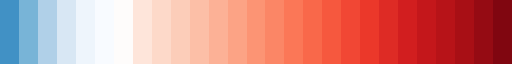

In [158]:
cmap

In [159]:
len(colors)

23

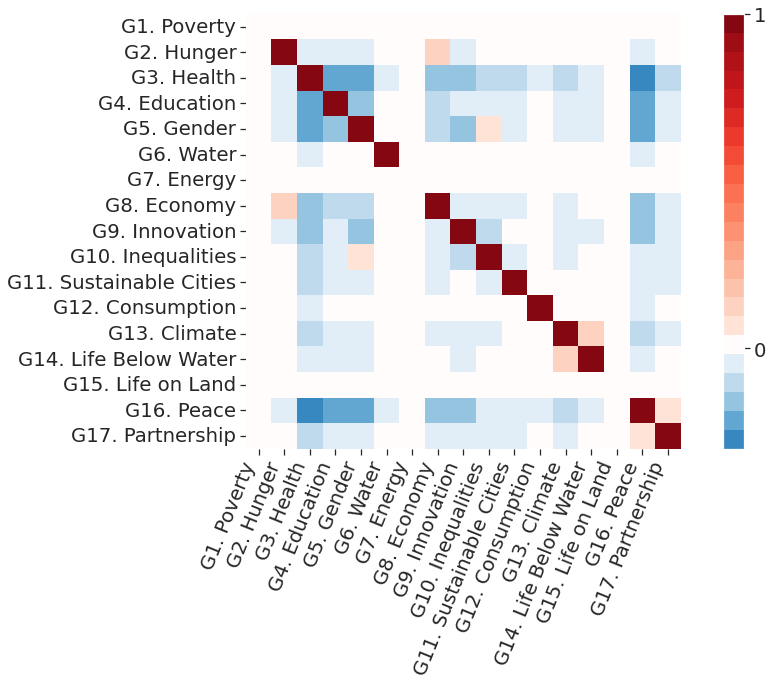

In [163]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.8)
cmap_reds = plt.get_cmap('Reds')
cmap_blues = plt.get_cmap('Blues_r')
num_colors = 16
num_colorsb = 6
colors = [cmap_blues(i / num_colorsb) for i in range(2, num_colorsb)]+['white'] + [cmap_reds(i / num_colors) for i in range(2, num_colors)]
cmap = LinearSegmentedColormap.from_list('', colors, num_colors+num_colorsb+1)
ax = sns.heatmap(df_corr, cmap=cmap, vmin=-0.3, vmax=1, square=True, cbar=False)

cbar = plt.colorbar(ax.collections[0], ticks=range(num_colors+num_colorsb + 1))
plt.xticks(rotation=68,ha='right')
ax.set_yticklabels(labels=ax.get_yticklabels(), va='center',  position=(0,0))
ax.tick_params(left=True, bottom=True)
ax.figure.savefig("corr_upsampled.pdf",dpi=300, bbox_inches='tight')
plt.show()

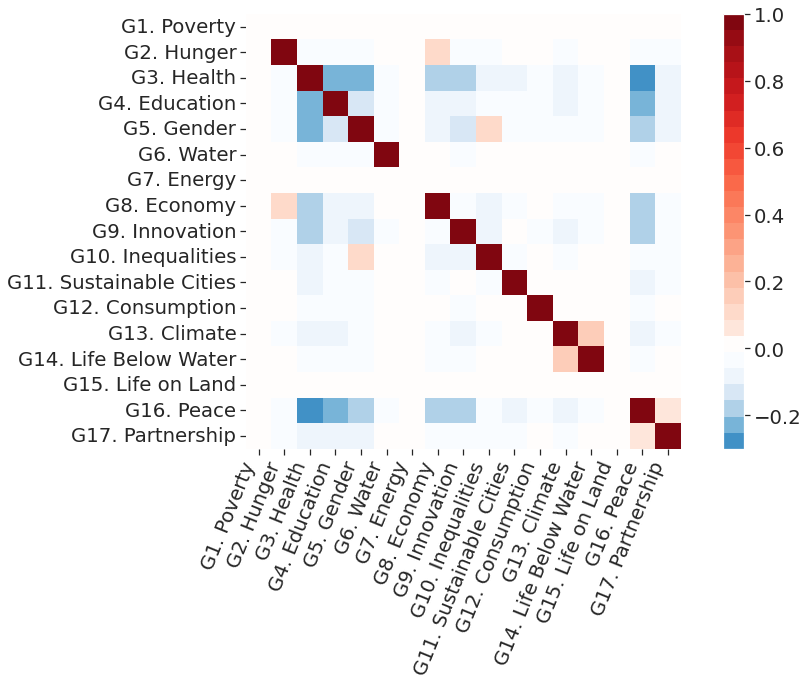

In [164]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.8)
cmap_reds = plt.get_cmap('Reds')
cmap_blues = plt.get_cmap('Blues_r')
num_colors = 19
num_colorsb = 7
colors = [cmap_blues(i / num_colorsb*1.3) for i in range(2, num_colorsb)]+['white'] + [cmap_reds(i / num_colors) for i in range(2, num_colors)]
cmap = LinearSegmentedColormap.from_list('', colors, num_colors+num_colorsb+1)
ax = sns.heatmap(df_corr, cmap=cmap, vmin=-0.3, vmax=1, square=True, cbar=False)
cbar = plt.colorbar(ax.collections[0], ticks=[-0.2,0,0.2,0.4,0.6,0.8,1])
plt.xticks(rotation=68,ha='right')
ax.set_yticklabels(labels=ax.get_yticklabels(), va='center',  position=(0,0))
ax.tick_params(left=True, bottom=True)
ax.figure.savefig("corr_upsampled.pdf",dpi=300, bbox_inches='tight')
plt.show()

<AxesSubplot:>

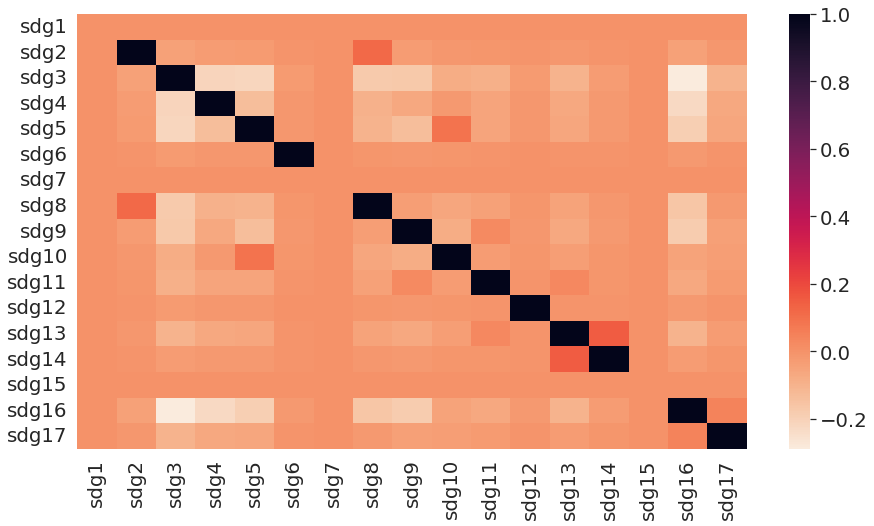

In [73]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.8)
sns.heatmap(df_corr, 
        xticklabels=df_corr.columns,
        yticklabels=df_corr.columns, cmap='rocket_r')

In [76]:
from sklearn.metrics import matthews_corrcoef

df_corr_binary=df_vector.iloc[:,-17:].corr(method=matthews_corrcoef)

In [82]:
df_corr

,sdg1,sdg2,sdg3,sdg4,sdg5,sdg6,sdg7,sdg8,sdg9,sdg10,sdg11,sdg12,sdg13,sdg14,sdg15,sdg16,sdg17
sdg1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
sdg2,0.0,1.000000,-0.043833,-0.027862,-0.025849,-0.002644,0.0,0.116055,-0.027862,-0.015271,-0.010681,-0.002644,-0.011974,-0.003741,0.0,-0.043094,-0.012278
sdg3,0.0,-0.043833,1.000000,-0.212659,-0.213859,-0.021873,0.0,-0.173222,-0.168012,-0.081838,-0.088372,-0.021873,-0.099070,-0.030954,0.0,-0.288539,-0.101585
sdg4,0.0,-0.027862,-0.212659,1.000000,-0.135937,-0.013903,0.0,-0.095252,-0.063787,-0.021397,-0.056172,-0.013903,-0.062972,-0.019675,0.0,-0.226632,-0.064571
sdg5,0.0,-0.025849,-0.213859,-0.135937,1.000000,-0.012899,0.0,-0.102149,-0.135937,0.091817,-0.052113,-0.012899,-0.058421,-0.018254,0.0,-0.191194,-0.059905
sdg6,0.0,-0.002644,-0.021873,-0.013903,-0.012899,1.000000,0.0,-0.010448,-0.013903,-0.007620,-0.005330,-0.001319,-0.005975,-0.001867,0.0,-0.021505,-0.006127
sdg7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
sdg8,0.0,0.116055,-0.173222,-0.095252,-0.102149,-0.010448,0.0,1.000000,-0.035834,-0.060348,-0.042211,-0.010448,-0.047320,-0.014785,0.0,-0.158989,-0.018285
sdg9,0.0,-0.027862,-0.168012,-0.063787,-0.135937,-0.013903,0.0,-0.035834,1.000000,-0.080309,0.026240,-0.013903,-0.062972,-0.019675,0.0,-0.181624,-0.040511
sdg10,0.0,-0.015271,-0.081838,-0.021397,0.091817,-0.007620,0.0,-0.060348,-0.080309,1.000000,-0.030787,-0.007620,-0.034514,-0.010784,0.0,-0.049438,-0.035391


In [81]:
df_corr_binary

,sdg1,sdg2,sdg3,sdg4,sdg5,sdg6,sdg7,sdg8,sdg9,sdg10,sdg11,sdg12,sdg13,sdg14,sdg15,sdg16,sdg17
sdg1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
sdg2,0.0,1.000000,-0.043833,-0.027862,-0.025849,-0.002644,0.0,0.116055,-0.027862,-0.015271,-0.010681,-0.002644,-0.011974,-0.003741,0.0,-0.043094,-0.012278
sdg3,0.0,-0.043833,1.000000,-0.212659,-0.213859,-0.021873,0.0,-0.173222,-0.168012,-0.081838,-0.088372,-0.021873,-0.099070,-0.030954,0.0,-0.288539,-0.101585
sdg4,0.0,-0.027862,-0.212659,1.000000,-0.135937,-0.013903,0.0,-0.095252,-0.063787,-0.021397,-0.056172,-0.013903,-0.062972,-0.019675,0.0,-0.226632,-0.064571
sdg5,0.0,-0.025849,-0.213859,-0.135937,1.000000,-0.012899,0.0,-0.102149,-0.135937,0.091817,-0.052113,-0.012899,-0.058421,-0.018254,0.0,-0.191194,-0.059905
sdg6,0.0,-0.002644,-0.021873,-0.013903,-0.012899,1.000000,0.0,-0.010448,-0.013903,-0.007620,-0.005330,-0.001319,-0.005975,-0.001867,0.0,-0.021505,-0.006127
sdg7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
sdg8,0.0,0.116055,-0.173222,-0.095252,-0.102149,-0.010448,0.0,1.000000,-0.035834,-0.060348,-0.042211,-0.010448,-0.047320,-0.014785,0.0,-0.158989,-0.018285
sdg9,0.0,-0.027862,-0.168012,-0.063787,-0.135937,-0.013903,0.0,-0.035834,1.000000,-0.080309,0.026240,-0.013903,-0.062972,-0.019675,0.0,-0.181624,-0.040511
sdg10,0.0,-0.015271,-0.081838,-0.021397,0.091817,-0.007620,0.0,-0.060348,-0.080309,1.000000,-0.030787,-0.007620,-0.034514,-0.010784,0.0,-0.049438,-0.035391


<AxesSubplot:>

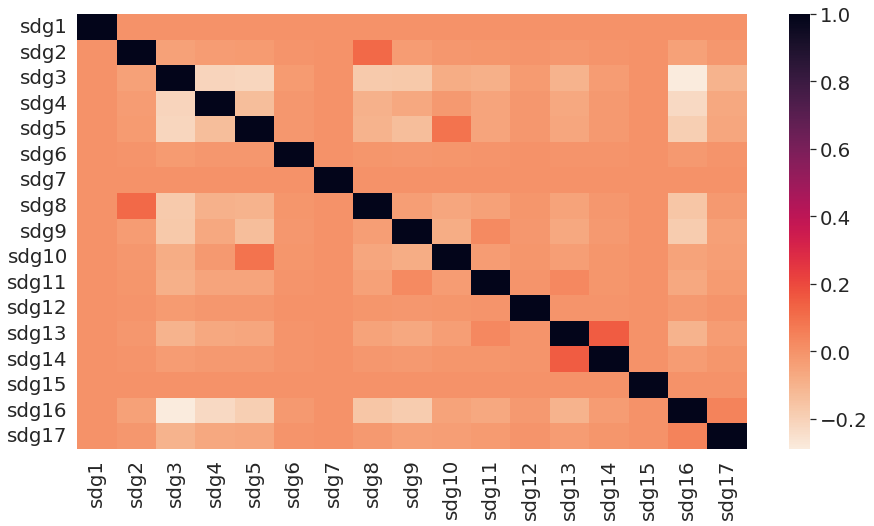

In [80]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.8)
sns.heatmap(df_corr_binary, 
        xticklabels=df_corr_binary.columns,
        yticklabels=df_corr_binary.columns, cmap='rocket_r')

## end

In [58]:
df_pivot=df_goals.groupby(['goal1','goal2']).ID.count().reset_index()

In [59]:
same_goal=pd.concat([df_all_goals_sg.goal1,df_all_goals_sg.goal2,df_all_goals_sg.goal3]).value_counts().reset_index().iloc[1:]

In [60]:
same_goal.columns=['goal1','ID']

In [61]:
same_goal=same_goal.assign(goal2=same_goal.goal1)

In [62]:
same_goal=same_goal.loc[:,['goal1','goal2','ID']]

In [63]:
df_pivot=df_pivot.loc[df_pivot.goal1!=df_pivot.goal2]

In [64]:
df_pivot=pd.concat([df_pivot,same_goal])

In [65]:
mapping={
'No Poverty':'G1. Poverty',
'Zero Hunger':'G2. Hunger',
'Good Health and Well-Being':'G3. Health',
'Quality Education':'G4. Education',
'Gender Equality':'G5. Gender',
'Clean Water and Sanitation':'G6. Water',
'Affordable and Clean Energy':'G7. Energy',
'Decent Work and Economic Growth':'G8. Economy',
'Industry, Innovation and Infrastructure':'G9. Innovation',
'Reduced Inequalities':'G10. Inequalities',
'Sustainable Cities and Communities':'G11. Sustainable Cities',
'Responsible Consumption and Production':'G12. Consumption',
'Climate Action':'G13. Climate',
'Life Below Water':'G14. Life Below Water',
'Life on Land':'G15. Life on Land',
'Peace, Justice and Strong Institutions':'G16. Peace',
'Partnership for the goals':'G17. Partnership',
}


In [66]:

df_pivot['goal1']=df_pivot.goal1.replace(mapping)
df_pivot['goal2']=df_pivot.goal2.replace(mapping)

In [67]:
df_pivot=df_pivot.assign(ID=np.where(df_pivot.goal1==df_pivot.goal2,df_pivot.ID/2,df_pivot.ID))

In [68]:
df_pivot=df_pivot.pivot("goal1", "goal2", "ID")

In [69]:
df_pivot=df_pivot.fillna(0)

In [70]:
index = df_pivot.index.union(df_pivot.columns)
df_pivot = df_pivot.reindex(index=index, columns=index, fill_value=0)

In [71]:
df_pivot=df_pivot.T+df_pivot

In [72]:
df_pivot

,G10. Inequalities,G11. Sustainable Cities,G12. Consumption,G13. Climate,G14. Life Below Water,G16. Peace,G17. Partnership,G2. Hunger,G3. Health,G4. Education,G5. Gender,G6. Water,G8. Economy,G9. Innovation
G10. Inequalities,32.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,3.0,6.0,0.0,0.0,0.0
G11. Sustainable Cities,0.0,16.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
G12. Consumption,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G13. Climate,0.0,1.0,0.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G14. Life Below Water,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G16. Peace,5.0,1.0,0.0,0.0,0.0,201.0,7.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0
G17. Partnership,0.0,0.0,0.0,0.0,0.0,7.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
G2. Hunger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0
G3. Health,3.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,202.0,2.0,0.0,0.0,0.0,7.0
G4. Education,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,0.0,0.0,1.0,7.0


In [73]:
df_pivot=df_pivot.reindex([ 'G2. Hunger','G3. Health',
       'G4. Education', 'G5. Gender','G6. Water', 'G8. Economy', 'G9. Innovation','G10. Inequalities', 'G11. Sustainable Cities', 'G12. Consumption',
       'G13. Climate','G14. Life Below Water', 'G16. Peace', 'G17. Partnership'])

In [74]:
df_pivot=df_pivot.loc[:,[ 'G2. Hunger','G3. Health',
       'G4. Education', 'G5. Gender','G6. Water', 'G8. Economy', 'G9. Innovation','G10. Inequalities', 'G11. Sustainable Cities', 'G12. Consumption',
       'G13. Climate','G14. Life Below Water', 'G16. Peace', 'G17. Partnership']]

In [75]:
df_pivot= df_pivot.astype(int)

In [76]:
cooccurrence_matrix=df_pivot.to_numpy()

In [77]:
cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
with np.errstate(divide='ignore', invalid='ignore'):
    cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal[:, None]))
print('\ncooccurrence_matrix_percentage:\n{0}'.format(cooccurrence_matrix_percentage))


cooccurrence_matrix_percentage:
[[1.         0.         0.         0.         0.         0.5
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         1.         0.00990099 0.         0.         0.
  0.03465347 0.01485149 0.         0.         0.         0.
  0.04950495 0.        ]
 [0.         0.02061856 1.         0.         0.         0.01030928
  0.07216495 0.03092784 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.07058824 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.03448276 0.         0.01724138 0.         0.         1.
  0.0862069  0.         0.         0.         0.         0.
  0.         0.01724138]
 [0.         0.07216495 0.07216495 0.         0.         0.05154639
  1.         0.     

df_pivot.loc['G13. Climate','G13. Climate']=1
df_pivot.loc['G16. Peace','G13. Climate']=0
df_pivot.loc['G13. Climate','G16. Peace']=0

In [78]:
df_pivot

,G2. Hunger,G3. Health,G4. Education,G5. Gender,G6. Water,G8. Economy,G9. Innovation,G10. Inequalities,G11. Sustainable Cities,G12. Consumption,G13. Climate,G14. Life Below Water,G16. Peace,G17. Partnership
G2. Hunger,4,0,0,0,0,2,0,0,0,0,0,0,0,0
G3. Health,0,202,2,0,0,0,7,3,0,0,0,0,10,0
G4. Education,0,2,97,0,0,1,7,3,0,0,0,0,0,0
G5. Gender,0,0,0,85,0,0,0,6,0,0,0,0,0,0
G6. Water,0,0,0,0,1,0,0,0,0,0,0,0,0,0
G8. Economy,2,0,1,0,0,58,5,0,0,0,0,0,0,1
G9. Innovation,0,7,7,0,0,5,97,0,3,0,0,0,5,1
G10. Inequalities,0,3,3,6,0,0,0,32,0,0,0,0,5,0
G11. Sustainable Cities,0,0,0,0,0,0,3,0,16,0,1,0,1,0
G12. Consumption,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [79]:
df_pivot_norm=df_pivot/cooccurrence_matrix_diagonal[:, None]

df_pivot_norm=df_pivot_norm.fillna(0)

In [80]:
df_pivot_norm.loc['G1. Poverty']=[0 for c in df_pivot_norm.columns]
#df_pivot_norm.loc['G2. Hunger']=[0 for c in df_pivot_norm.columns]
#df_pivot_norm.loc['G6. Water']=[0 for c in df_pivot_norm.columns]
df_pivot_norm.loc['G7. Energy']=[0 for c in df_pivot_norm.columns]
#df_pivot_norm.loc['G14. Life Below Water']=[0 for c in df_pivot_norm.columns]
df_pivot_norm.loc['G15. Life on Land']=[0 for c in df_pivot_norm.columns]

In [81]:
df_pivot_norm['G1. Poverty']=0
#df_pivot_norm['G2. Hunger']=0
#df_pivot_norm['G6. Water']=0
df_pivot_norm['G7. Energy']=0
#df_pivot_norm['G14. Life Below Water']=0
df_pivot_norm['G15. Life on Land']=0

In [82]:
df_pivot_norm=df_pivot_norm.reindex(['G1. Poverty', 'G2. Hunger','G3. Health',
       'G4. Education', 'G5. Gender','G6. Water','G7. Energy', 'G8. Economy', 'G9. Innovation','G10. Inequalities', 'G11. Sustainable Cities', 'G12. Consumption',
       'G13. Climate','G14. Life Below Water','G15. Life on Land', 'G16. Peace', 'G17. Partnership'])

df_pivot_norm=df_pivot_norm.loc[:,['G1. Poverty', 'G2. Hunger','G3. Health',
       'G4. Education', 'G5. Gender','G6. Water','G7. Energy', 'G8. Economy', 'G9. Innovation','G10. Inequalities', 'G11. Sustainable Cities', 'G12. Consumption',
       'G13. Climate','G14. Life Below Water','G15. Life on Land', 'G16. Peace', 'G17. Partnership']]

In [83]:
cooccurrence_matrix_diagonal[:, None]

array([[  4],
       [202],
       [ 97],
       [ 85],
       [  1],
       [ 58],
       [ 97],
       [ 32],
       [ 16],
       [  1],
       [ 20],
       [  2],
       [201],
       [ 21]])

In [84]:
4/80

0.05

In [85]:
pd.DataFrame(cooccurrence_matrix_percentage)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.000000,0.000000,0.0000,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.0000,0.00,0.000000,0.000000
1,0.000000,1.000000,0.009901,0.0000,0.0,0.000000,0.034653,0.014851,0.000000,0.0,0.0000,0.00,0.049505,0.000000
2,0.000000,0.020619,1.000000,0.0000,0.0,0.010309,0.072165,0.030928,0.000000,0.0,0.0000,0.00,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.0000,0.0,0.000000,0.000000,0.070588,0.000000,0.0,0.0000,0.00,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.00,0.000000,0.000000
5,0.034483,0.000000,0.017241,0.0000,0.0,1.000000,0.086207,0.000000,0.000000,0.0,0.0000,0.00,0.000000,0.017241
6,0.000000,0.072165,0.072165,0.0000,0.0,0.051546,1.000000,0.000000,0.030928,0.0,0.0000,0.00,0.051546,0.010309
7,0.000000,0.093750,0.093750,0.1875,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0000,0.00,0.156250,0.000000
8,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.187500,0.000000,1.000000,0.0,0.0625,0.00,0.062500,0.000000
9,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0000,0.00,0.000000,0.000000


In [86]:
from matplotlib.colors import LogNorm, Normalize, LogNorm

In [87]:
df_pivot.min().min()

0

In [88]:
LogNorm(1,df_pivot.max().max())

In [89]:
df_goals.goal1.value_counts()

Good Health and Well-Being                 196
Peace, Justice and Strong Institutions     182
Quality Education                           92
Gender Equality                             80
Industry, Innovation and Infrastructure     79
Decent Work and Economic Growth             54
Reduced Inequalities                        21
Climate Action                              19
Partnership for the goals                   15
Sustainable Cities and Communities          14
Zero Hunger                                  4
Responsible Consumption and Production       1
Life Below Water                             1
Clean Water and Sanitation                   1
Name: goal1, dtype: int64

In [90]:
df_goals.loc[df_goals.goal1!=df_goals.goal2].goal2.value_counts()

Industry, Innovation and Infrastructure    18
Peace, Justice and Strong Institutions     14
Reduced Inequalities                       11
Partnership for the goals                   6
Good Health and Well-Being                  6
Quality Education                           5
Decent Work and Economic Growth             4
Gender Equality                             3
Sustainable Cities and Communities          2
Climate Action                              1
Life Below Water                            1
Name: goal2, dtype: int64

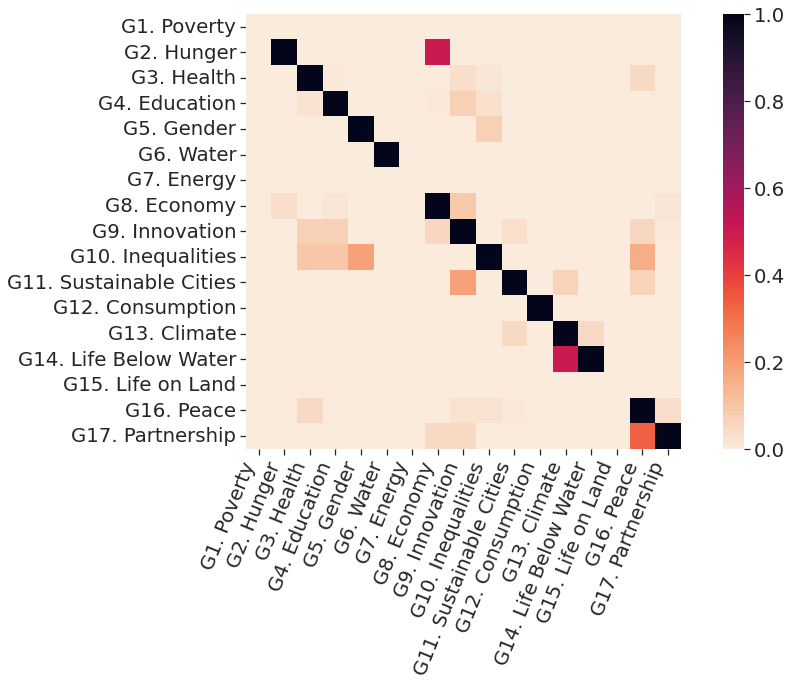

In [91]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.8)
ax = sns.heatmap(df_pivot_norm,square=True,annot=False,fmt=".1f",robust=True,cmap='rocket_r')
plt.xticks(rotation=68,ha='right')
#ax.set_yticklabels(labels=ax.get_yticklabels(), va='left')
ax.set_yticklabels(labels=ax.get_yticklabels(), va='center',  position=(0,0))
ax.tick_params(left=True, bottom=True)
ax.figure.savefig("co_occurrences_upsampled.pdf",dpi=300, bbox_inches='tight')

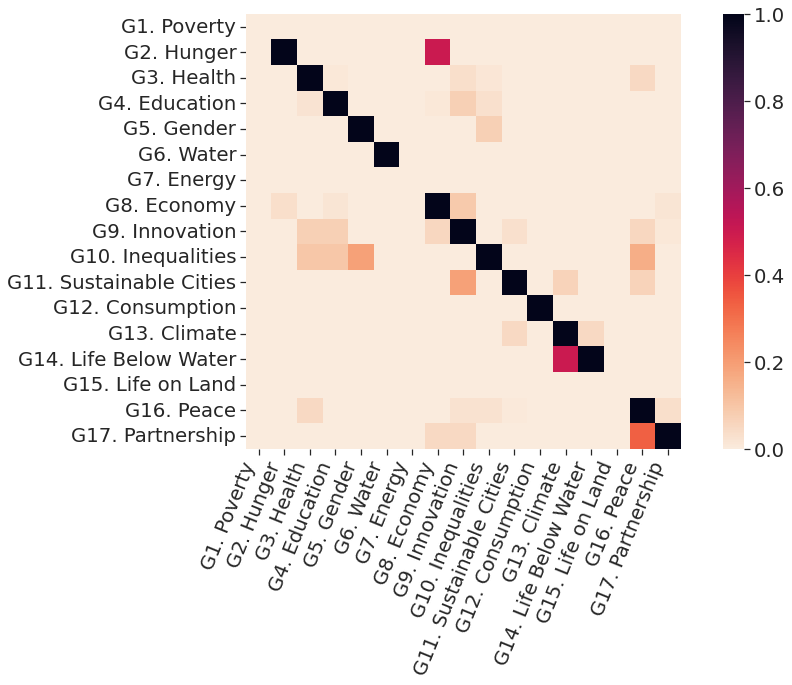

In [92]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.8)
ax = sns.heatmap(df_pivot_norm,square=True,annot=False,fmt=".1f",robust=True,cmap='rocket_r')
plt.xticks(rotation=68,ha='right')
#ax.set_yticklabels(labels=ax.get_yticklabels(), va='left')
ax.set_yticklabels(labels=ax.get_yticklabels(), va='center',  position=(0,0))
ax.tick_params(left=True, bottom=True)


In [92]:
df_pivot.loc['G1. Poverty']=[0 for c in df_pivot.columns]
#df_pivot.loc['G2. Hunger']=[0 for c in df_pivot.columns]
#df_pivot.loc['G6. Water']=[0 for c in df_pivot.columns]
df_pivot.loc['G7. Energy']=[0 for c in df_pivot.columns]
#df_pivot.loc['G14. Life Below Water']=[0 for c in df_pivot.columns]
df_pivot.loc['G15. Life on Land']=[0 for c in df_pivot.columns]

df_pivot['G1. Poverty']=0
#df_pivot['G2. Hunger']=0
#df_pivot['G6. Water']=0
df_pivot['G7. Energy']=0
#df_pivot['G14. Life Below Water']=0
df_pivot['G15. Life on Land']=0

df_pivot=df_pivot.reindex(['G1. Poverty', 'G2. Hunger','G3. Health',
       'G4. Education', 'G5. Gender','G6. Water','G7. Energy', 'G8. Economy', 'G9. Innovation','G10. Inequalities', 'G11. Sustainable Cities', 'G12. Consumption',
       'G13. Climate','G14. Life Below Water','G15. Life on Land', 'G16. Peace', 'G17. Partnership'])

df_pivot=df_pivot.loc[:,['G1. Poverty', 'G2. Hunger','G3. Health',
       'G4. Education', 'G5. Gender','G6. Water','G7. Energy', 'G8. Economy', 'G9. Innovation','G10. Inequalities', 'G11. Sustainable Cities', 'G12. Consumption',
       'G13. Climate','G14. Life Below Water','G15. Life on Land', 'G16. Peace', 'G17. Partnership']]

In [93]:
for i in df_pivot.columns:
    try:
        df_pivot[[i]] = df_pivot[[i]].astype(float).astype(int)
    except:
        pass


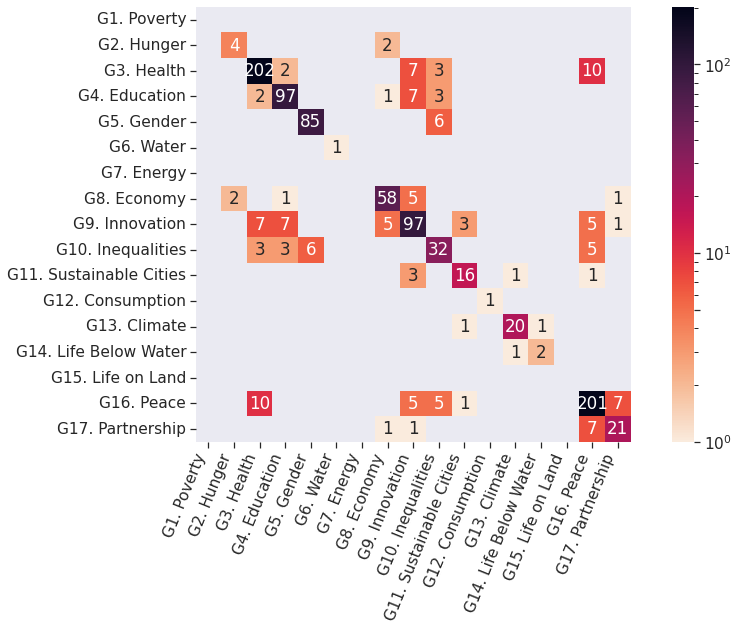

In [95]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(df_pivot,square=True,annot=True,fmt="d",norm=LogNorm(1,df_pivot.max().max()),robust=True,cmap='rocket_r',
                cbar_kws={"ticks":[0,1,5,10,1e2]})
plt.xticks(rotation=68,ha='right')
ax.tick_params(left=True, bottom=True)


In [98]:
202/759

0.26613965744400525

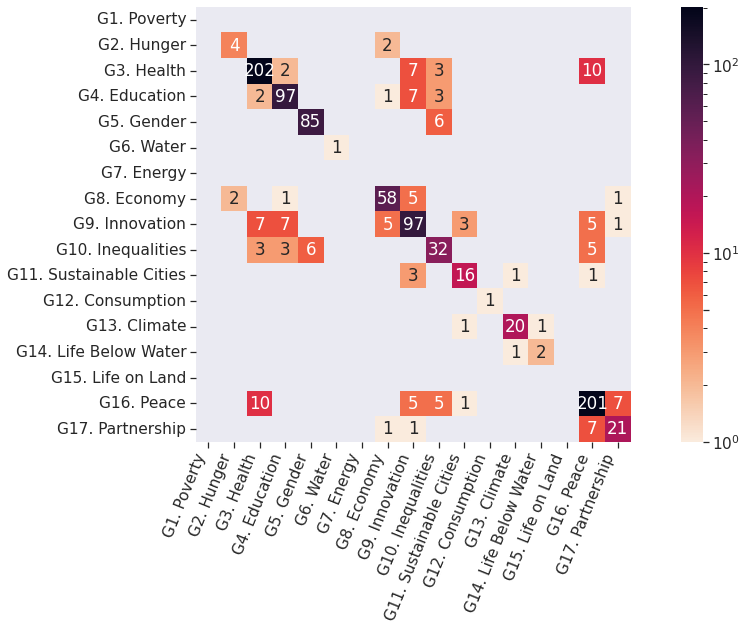

In [94]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(df_pivot,square=True,annot=True,fmt="d",norm=LogNorm(1,df_pivot.max().max()),robust=True,cmap='rocket_r',
                cbar_kws={"ticks":[0,1,5,10,1e2]},xticklabels=1, yticklabels=1)
plt.xticks(rotation=68,ha='right')
ax.tick_params(left=True, bottom=True)
ax.figure.savefig("heatmap_goal.pdf",dpi=300, bbox_inches='tight')

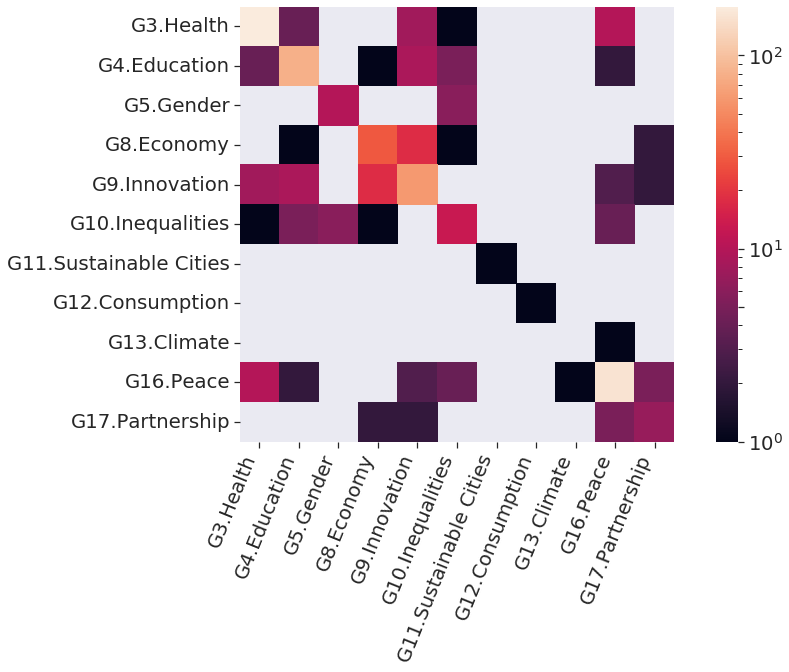

In [229]:
plt.figure(figsize=(15,8))
#sns.set(font_scale=2)
ax = sns.heatmap(df_pivot,square=True,fmt="d",norm=LogNorm(1,df_pivot.max().max()),robust=True,
                cbar_kws={"ticks":[0,1,5,10,1e2]}, annot_kws={"size":2})
plt.xticks(rotation=68,ha='right')
ax.tick_params(left=True, bottom=True)

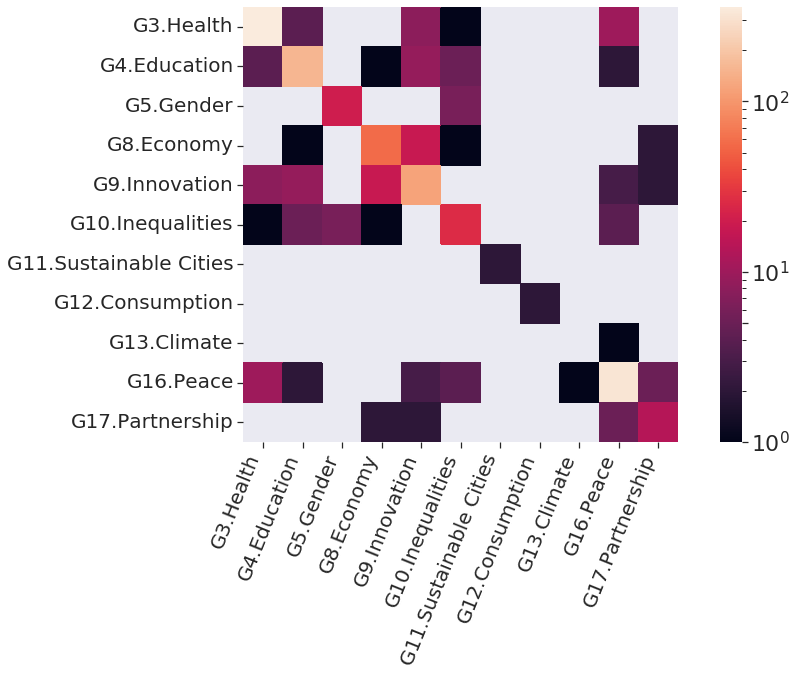

In [213]:
plt.figure(figsize=(15,8))
#sns.set(font_scale=2)
ax = sns.heatmap(df_pivot,square=True,fmt="d",norm=LogNorm(1,df_pivot.max().max()),robust=True,
                cbar_kws={"ticks":[0,1,5,10,1e2]}, annot_kws={"size":2})
plt.xticks(rotation=68,ha='right',size=20)
plt.yticks(size=20)
ax.tick_params(left=True, bottom=True)

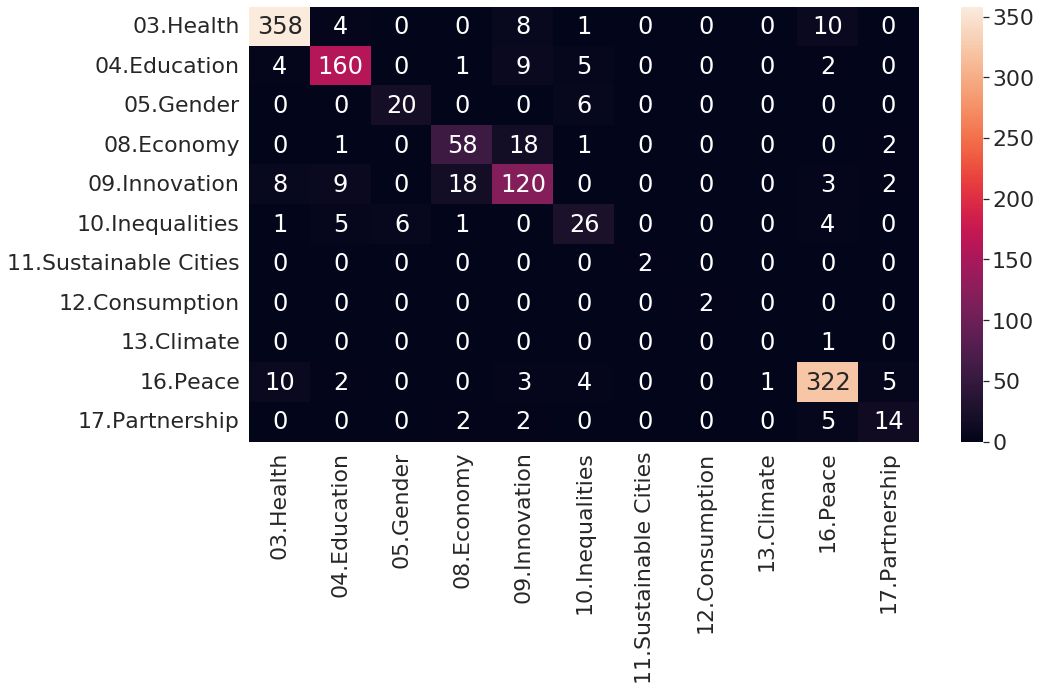

In [72]:
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
ax = sns.heatmap(df_pivot, annot=True, fmt="d")
